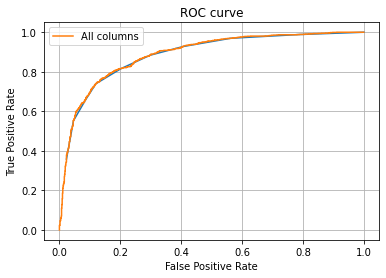

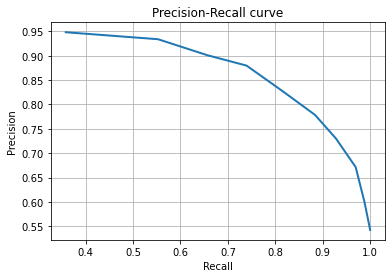

ROC-AUC Sklearn:  0.8885580033682572
ROC-AUC Handle:  0.8815119067546193


In [3]:
import numpy
import pandas
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

data = pandas.read_csv('./athletes.csv', delimiter=(','))

# обнуляем ячейки с отсутствием данных
data = data[pandas.isnull(data['height']) == 0 ]
data = data[pandas.isnull(data['weight']) == 0 ]

labelEncoder = LabelEncoder()
labelEncoder.fit(data['sex'])
Y = pandas.Series(labelEncoder.transform(data['sex']))
X = pandas.get_dummies(data.loc[:, ['height', 'weight', "sport"]])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

predictions = model.predict_proba(X_test)

tpr = []
fpr = []
precisions = []
recalls = []
thresholds = []
for threshold in numpy.arange(0,1,0.1):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip( predictions[:,1], Y_test ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
        
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr.append(tp/(tp+fn))
    fpr.append(fp/(fp+tn))
    precisions.append(tp / (tp + fp))
    recalls.append(tp / (tp + fn))
    thresholds.append(threshold)

sk_auc = roc_auc_score( Y_test, predictions[:, 1] )
hd_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)

fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1] )

plt.plot( fpr, tpr, label = 'All columns' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = 0)
plt.grid()
plt.show()

plt.plot(recalls, precisions, linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.grid()
plt.show()

print('ROC-AUC Sklearn: ',sk_auc)
Вprint('ROC-AUC Handle: ', hd_auc)


Ручной подсчет кривой ROC накладывется на автоматический с практически идентичными показателями.

Выводы:
a. 
По Precision-Recall графику модель можно определить тем лучше, чем больше изгиб дуги в направлении едениц Precision и Recall.
По ROC  графику модель можно определить тем лучше, чем больше изгиб дуги в направлении еденицы True Positive Rate.

b. 
Да, кривая может проходить ниже диагонали полностью или частично.